In [10]:
import pandas as pd
import numpy as np

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Illegal line #217
	"       - 'Nanum'
"
	in file "/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc"


In [59]:
# 1. 데이터 가져오기

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [60]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [79]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [107]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [109]:
# 2,3. 모델에 입력할 데이터 X, y 준비하기

df_X = diabetes.data
df_y = diabetes.target

In [110]:
# 4. train 데이터와 test 데이터 분리하기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [111]:
# 5. 모델 준비하기

W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [112]:
# 6. 손실함수 loss 정의하기 (MSE함수)

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [113]:
# 7. 기울기를 구하는 gradient함수 구현하기

def gradient(X, W, b, y):
    N = len(W)                            # N은 데이터의 개수
    y_pred = model(X, W, b)               # y_pred 준비
    dW = 1/N * 2 * X.T.dot(y_pred - y)    # 공식에 맞게 gradient 계산
    db = 2 * (y_pred - y).mean()          # b의 gradient 계산
    return dW, db



In [114]:
# 하이퍼 파라미터인 학습률 설정하기

LEARNING_RATE = 0.1

In [115]:
# 모델 학습하기

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(df_X, W, b, df_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 10 : Loss 4388.6375
Iteration 20 : Loss 3571.9995
Iteration 30 : Loss 3315.6767
Iteration 40 : Loss 3177.2141
Iteration 50 : Loss 3090.9852
Iteration 60 : Loss 3033.3894
Iteration 70 : Loss 2993.6295
Iteration 80 : Loss 2965.7352
Iteration 90 : Loss 2945.9818
Iteration 100 : Loss 2931.8988
Iteration 110 : Loss 2921.8003
Iteration 120 : Loss 2914.5193
Iteration 130 : Loss 2909.2418
Iteration 140 : Loss 2905.3961
Iteration 150 : Loss 2902.5791
Iteration 160 : Loss 2900.5050
Iteration 170 : Loss 2898.9698
Iteration 180 : Loss 2897.8277
Iteration 190 : Loss 2896.9736
Iteration 200 : Loss 2896.3314
Iteration 210 : Loss 2895.8457
Iteration 220 : Loss 2895.4760
Iteration 230 : Loss 2895.1926
Iteration 240 : Loss 2894.9735
Iteration 250 : Loss 2894.8023
Iteration 260 : Loss 2894.6668
Iteration 270 : Loss 2894.5578
Iteration 280 : Loss 2894.4686
Iteration 290 : Loss 2894.3938
Iteration 300 : Loss 2894.3296
Iteration 310 : Loss 2894.2730
Iteration 320 : Loss 2894.2218
Iteration 330 : L

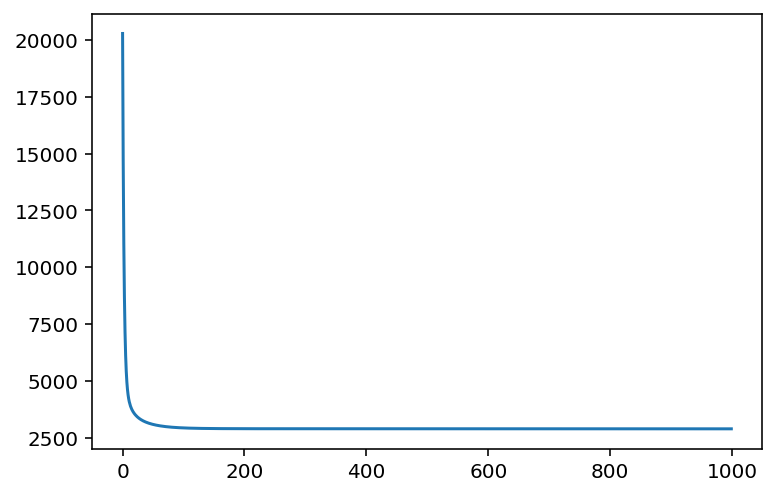

In [116]:
plt.plot(losses)
plt.show()

In [117]:
# test 데이터에 대한 성능 확인하기

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse


2885.5210076374474

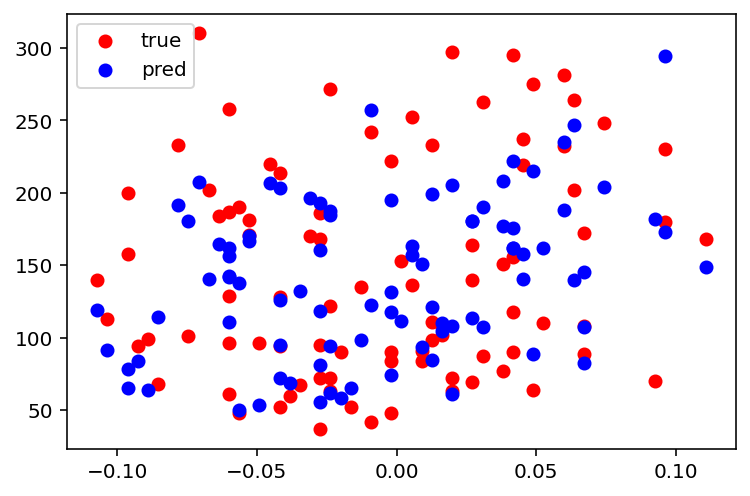

In [120]:
# 정답 데이터와 예측한 데이터 시각화하기

plt.scatter(X_test[:, 0], y_test, label="true", color = 'red')
plt.scatter(X_test[:, 0], prediction,label="pred", color = 'blue')
plt.legend()
plt.show()




우어어어어